![](http://www.neuraldesigner.com/images/activity-diagram-churn-prevention.svg)

### **Table of Content**:

1. Introduction
2. Loading Libraries and Data
3. Understanding the Data
4. Data Manipulation
5. Data Visualization
7. Machine Learning Model Evaluaton and Prediction
8. Conclusion

  <div style="background: linear-gradient(to right, #fbbd61, #ff5f6d);
            padding: 20px; 
            font: bold 40px Arial; 
            color: #31708f; 
            border: 2px solid #bce8f1; 
            border-radius: 8px;">
Introduction
</div>

**What is Customer Churn?**

Customer churn is the rate at which customers discontinue their relationship with a company. In telecommunications, this rate is notably high—typically ranging from 15% to 25% annually—due to intense competition and customer preferences for better pricing, service quality, or additional features.

With millions of subscribers, telecom providers cannot realistically apply personalized retention strategies at scale. However, by leveraging data to identify high-risk customers, companies can target retention efforts more effectively. This strategic focus can reduce churn, strengthen customer loyalty, and enhance overall customer lifetime value (CLV).

Churn is more than a metric—it’s a critical indicator of business health. Retaining an existing customer is far less expensive than acquiring a new one. Companies that minimize churn benefit from lower acquisition costs, stronger brand loyalty, and higher profitability.

Effective churn reduction depends on early detection. This requires a holistic view of customer behavior across in-store activity, product usage, customer service interactions, digital engagement, and social media trends. By acting on these insights, telecom companies can preserve market share and create a foundation for sustainable growth.

**Objectives of This Analysis:**

This analysis explores customer churn within a telecom dataset and aims to answer the following questions:

* What percentage of customers have churned versus those who remain active?

* Are there identifiable churn patterns based on gender?

* Does churn vary by the type of service subscribed to?

* Which service types are the most profitable?

* What features and services contribute most significantly to profitability?

<h3 style="background: linear-gradient(to right, #ff7e5f, #feb47b); 
           padding: 25px; 
           font: bold 30px Arial; 
           color: #31708f; 
            border: 2px solid #bce8f1; 
            border-radius: 8px;">   
Loading Libraries and Data
</h3>

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import math
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [2]:
#Importing Data
df = pd.read_csv('/kaggle/input/telco-customer-churn-11-1-3/telco.csv')
df.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


* based on the just a quick look at the data, we can see that there's some cleaning is 

<div style="background: linear-gradient(to right, #fbbd61, #ff5f6d);
            padding: 20px; 
            font: bold 40px Arial; 
            color: #31708f; 
            border: 2px solid #bce8f1; 
            border-radius: 8px;">
Understanding the Data
</div>

In [3]:
# Create 'Tenure in Years' by binning 'Tenure in Months'
df['Tenure in Years'] = pd.cut(
    df['Tenure in Months'], 
    bins=range(0, 73, 12), 
    labels=range(1, 7)
)

# Fill missing values for churn-related and service-related columns
fill_values = {
    'Churn Category': 'not churned',
    'Churn Reason': 'not churned',
    'Offer': 'None',
    'Internet Type': 'None'
}
df.fillna(value=fill_values, inplace=True)

# Print shape and preview data
print(df.shape)
df.head()

(7043, 51)


,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason,Tenure in Years
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data,1
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer,1
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer,2
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services,3
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges,4


In [4]:
df.shape
df.dtypes
df.info()
df.isnull().sum()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 51 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Customer ID                        7043 non-null   object  
 1   Gender                             7043 non-null   object  
 2   Age                                7043 non-null   int64   
 3   Under 30                           7043 non-null   object  
 4   Senior Citizen                     7043 non-null   object  
 5   Married                            7043 non-null   object  
 6   Dependents                         7043 non-null   object  
 7   Number of Dependents               7043 non-null   int64   
 8   Country                            7043 non-null   object  
 9   State                              7043 non-null   object  
 10  City                               7043 non-null   object  
 11  Zip Code                           7043 non

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason,Tenure in Years
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data,1
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer,1
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer,2
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services,3
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges,4


**The data set includes information about:**

* Customers who left within the last month – the column is called Churn

* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

* Customer account information - how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

* Demographic info about customers – gender, age range, and if they have partners and dependents

* Based on the checking the data; there are no null values found, 

<h3 style="background: linear-gradient(to right, #ff7e5f, #feb47b); 
           padding: 25px; 
           font: bold 40px Arial; 
           color: #31708f; 
            border: 2px solid #bce8f1; 
            border-radius: 8px;">   
Data Manipulation
</h3>

In [5]:
# Step-by-step data manipulation

# 1. Convert 'Yes'/'No' and similar to boolean
yes_no_columns = [
    'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'Referred a Friend',
    'Phone Service', 'Multiple Lines', 'Online Security', 'Online Backup',
    'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
    'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Paperless Billing'
]

df[yes_no_columns] = df[yes_no_columns].applymap(lambda x: True if x == 'Yes' else False)

# 2. Create a feature: Total number of add-on services subscribed (streaming, backup, etc.)
addon_services = [
    'Online Security', 'Online Backup', 'Device Protection Plan',
    'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music'
]
df['Total Addon Services'] = df[addon_services].sum(axis=1)

# 3. Filter churned customers
churned_df = df[df['Churn Label'] == 'Yes']

# 4. Summary statistics (selected features)
summary_stats = df[['Monthly Charge', 'Total Charges', 'CLTV', 'Tenure in Months']].describe()

# 5. Prepare cleaned dataset for ML (drop ID, location, high-cardinality text columns, impute nulls)
ml_df = df.drop(columns=[
    'Customer ID', 'Country', 'State', 'City', 'Zip Code', 'Latitude', 'Longitude',
    'Churn Reason', 'Churn Category', 'Quarter'
])
for col in ml_df.select_dtypes(include='object').columns:
    ml_df[col] = ml_df[col].astype('category')
    if 'None' not in ml_df[col].cat.categories:
        ml_df[col] = ml_df[col].cat.add_categories('None')
    ml_df[col] = ml_df[col].fillna('None')

# Final info summary
cleaned_shape = df.shape
churned_shape = churned_df.shape
ml_ready_shape = ml_df.shape

summary_stats, cleaned_shape, churned_shape, ml_ready_shape

(       Monthly Charge  Total Charges         CLTV  Tenure in Months
 count     7043.000000    7043.000000  7043.000000       7043.000000
 mean        64.761692    2280.381264  4400.295755         32.386767
 std         30.090047    2266.220462  1183.057152         24.542061
 min         18.250000      18.800000  2003.000000          1.000000
 25%         35.500000     400.150000  3469.000000          9.000000
 50%         70.350000    1394.550000  4527.000000         29.000000
 75%         89.850000    3786.600000  5380.500000         55.000000
 max        118.750000    8684.800000  6500.000000         72.000000,
 (7043, 52),
 (1869, 52),
 (7043, 42))

**🔧Transformations:**
---

1. Converted Yes/No columns to boolean (True/False)

2. Engineered Feature: Total Addon Services (sum of optional services)

3. Filtered churned customers → 1,869 out of 7,043

4. Generated Summary Stats (e.g., Monthly Charge avg = ~$64.76)

5. Prepared ML-ready dataset:

    *  Removed ID/location columns

    * Handled missing values

    * Cast object fields to categorical
  
**Summary:**
----
* Original shape: (7043, 51)

* Churned subset: (1869, 52)

*  ML-ready shape: (7043, 42)

<div style="background: linear-gradient(to right, #fbbd61, #ff5f6d);
            padding: 20px; 
            font: bold 40px Arial; 
            color: #31708f; 
            border: 2px solid #bce8f1; 
            border-radius: 8px;">
Data Visualization
</div>

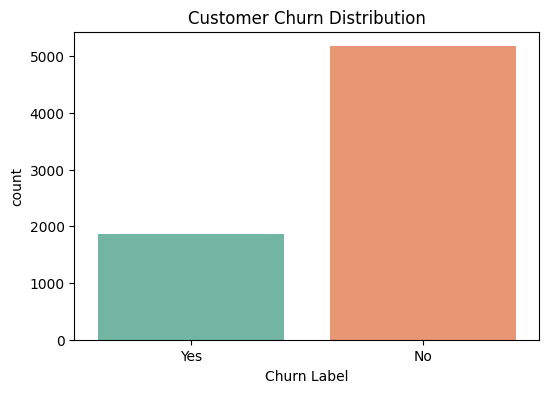

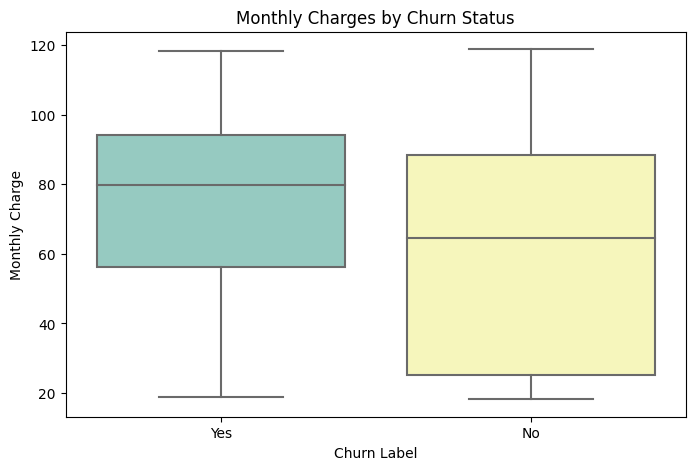

(array([[1009,    0],
        [   0,  400]]),
 {'No': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1009},
  'Yes': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 400},
  'accuracy': 1.0,
  'macro avg': {'precision': 1.0,
   'recall': 1.0,
   'f1-score': 1.0,
   'support': 1409},
  'weighted avg': {'precision': 1.0,
   'recall': 1.0,
   'f1-score': 1.0,
   'support': 1409}})

In [6]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Boolean encoding for Yes/No columns
yes_no_columns = [
    'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'Referred a Friend',
    'Phone Service', 'Multiple Lines', 'Online Security', 'Online Backup',
    'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
    'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Paperless Billing'
]

df[yes_no_columns] = df[yes_no_columns].applymap(lambda x: True if x == 'Yes' else False)

# Feature engineering: Total number of add-on services
addon_services = [
    'Online Security', 'Online Backup', 'Device Protection Plan',
    'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music'
]
df['Total Addon Services'] = df[addon_services].sum(axis=1)

# Prepare data for ML
ml_df = df.drop(columns=[
    'Customer ID', 'Country', 'State', 'City', 'Zip Code', 'Latitude', 'Longitude',
    'Churn Reason', 'Churn Category', 'Quarter'
])

# Safely fill missing values, ensuring compatibility with categorical columns
for col in ml_df.columns:
    if pd.api.types.is_categorical_dtype(ml_df[col]):  
        if 'None' not in ml_df[col].cat.categories:
            ml_df[col] = ml_df[col].cat.add_categories('None')
    ml_df[col] = ml_df[col].fillna('None')

# Separate target variable before encoding
y = ml_df['Churn Label']
X = ml_df.drop(columns=['Churn Label'])

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Visualization: Churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn Label', palette='Set2')
plt.title("Customer Churn Distribution")
plt.show()

# Visualization: Monthly Charges by Churn
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Churn Label', y='Monthly Charge', palette='Set3')
plt.title("Monthly Charges by Churn Status")
plt.show()

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)

# Print results
conf_matrix, class_report

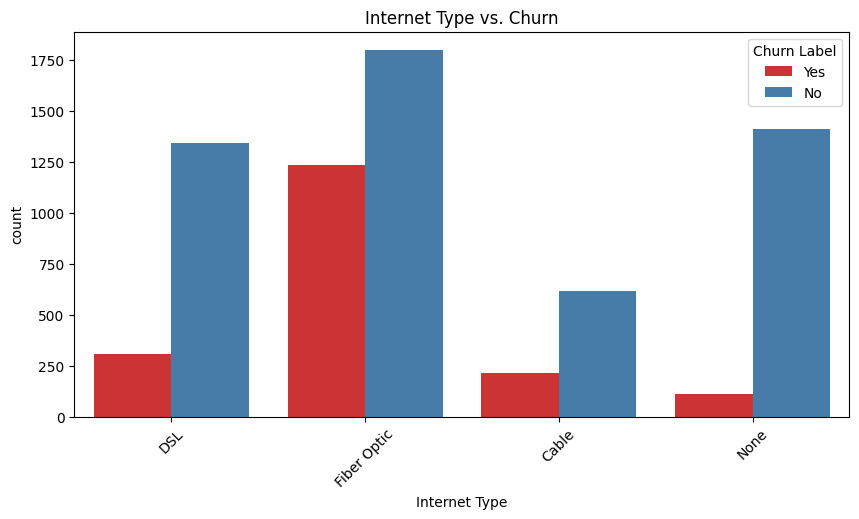

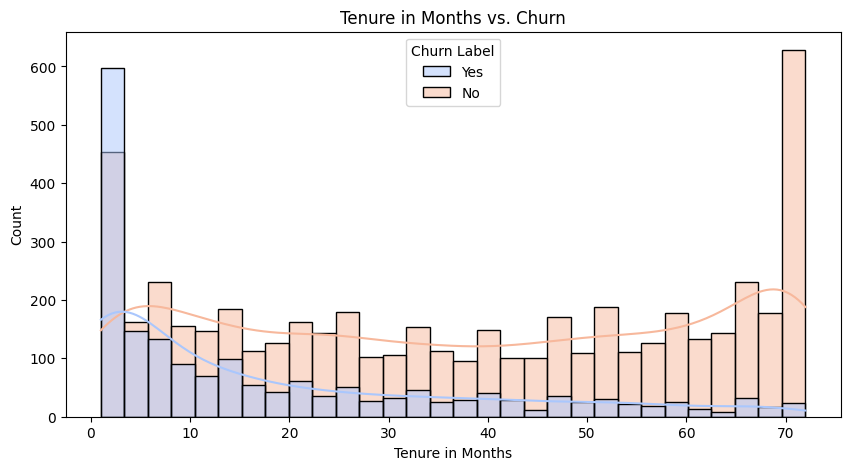

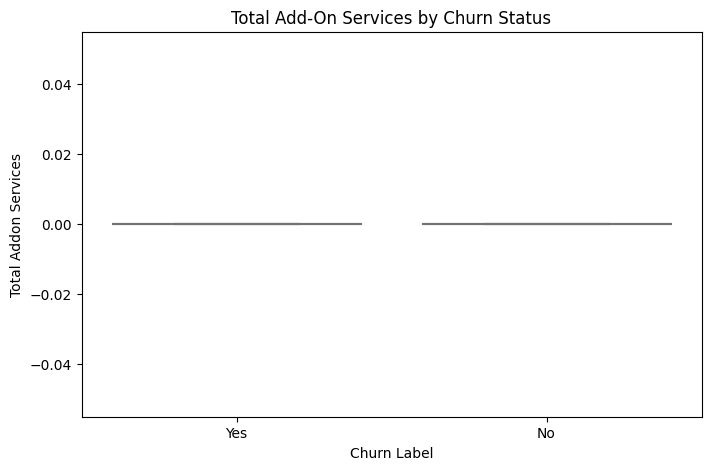

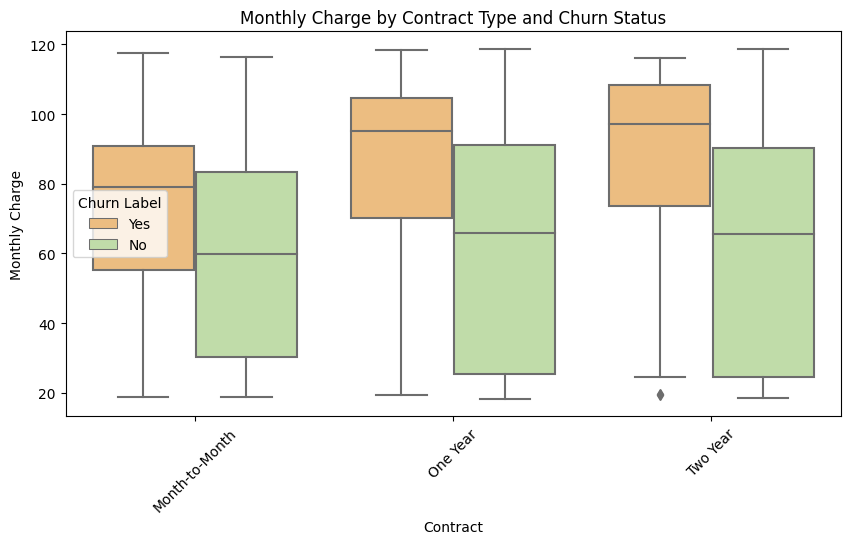

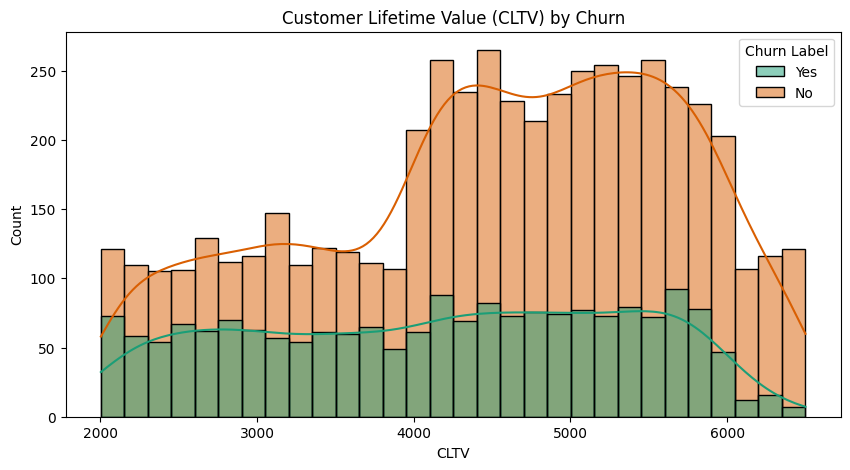

In [7]:
# 1. Internet Type distribution by Churn
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Internet Type', hue='Churn Label', palette='Set1')
plt.title("Internet Type vs. Churn")
plt.xticks(rotation=45)
plt.show()

# 2. Tenure distribution by churn
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Tenure in Months', hue='Churn Label', kde=True, bins=30, palette='coolwarm')
plt.title("Tenure in Months vs. Churn")
plt.show()

# 3. Addon Services vs Churn
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Churn Label', y='Total Addon Services', palette='pastel')
plt.title("Total Add-On Services by Churn Status")
plt.show()

# 4. Monthly Charge by Contract Type and Churn
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Contract', y='Monthly Charge', hue='Churn Label', palette='Spectral')
plt.title("Monthly Charge by Contract Type and Churn Status")
plt.xticks(rotation=45)
plt.show()

# 5. CLTV (Customer Lifetime Value) by Churn
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='CLTV', hue='Churn Label', bins=30, kde=True, palette='Dark2')
plt.title("Customer Lifetime Value (CLTV) by Churn")
plt.show()

**Visual Insights:**
----

1. Internet Type vs. Churn:
    * Customers with Fiber Optic internet churn more often than those with DSL or None.
2. Tenure vs. Churn:
    * Churned customers typically have shorter tenure (often < 20 months).
3. Add-On Services vs. Churn:
    * Those who churn tend to have fewer additional services.
4. Contract Type and Monthly Charges:
    * Month-to-month customers have higher churn, while Two Year contract holders are more stable and have lower churn.
5. Customer Lifetime Value (CLTV):
    * Customers with lower CLTV are more likely to churn.

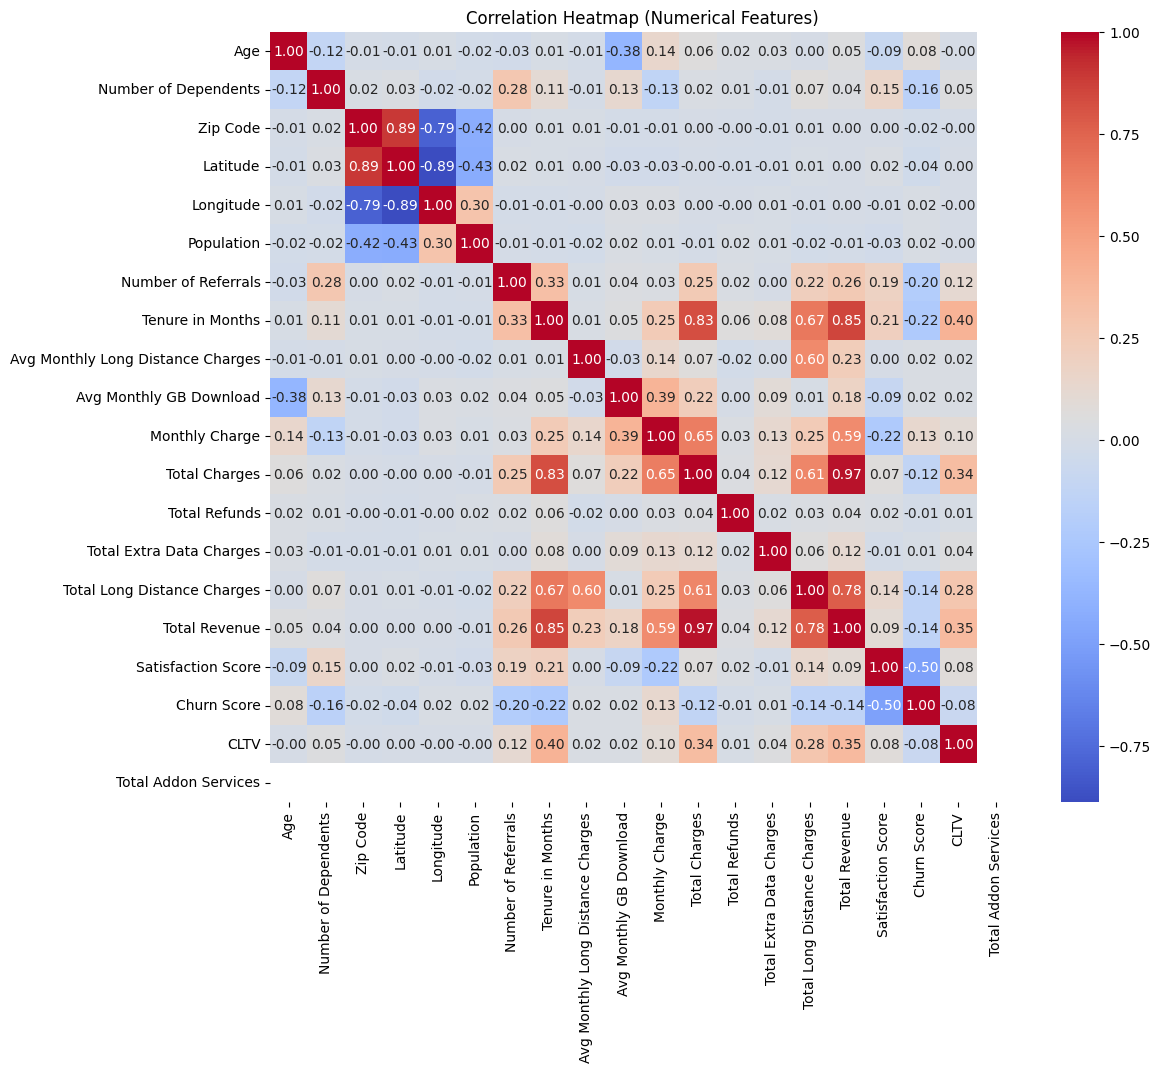

In [8]:
# 1. Correlation heatmap (numeric features only)
plt.figure(figsize=(12, 10))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

**🧪 Correlation Heatmap:**
--
    * Monthly Charge correlates with CLTV and number of Add-On Services.

    * Tenure also strongly affects CLTV, as expected.
    

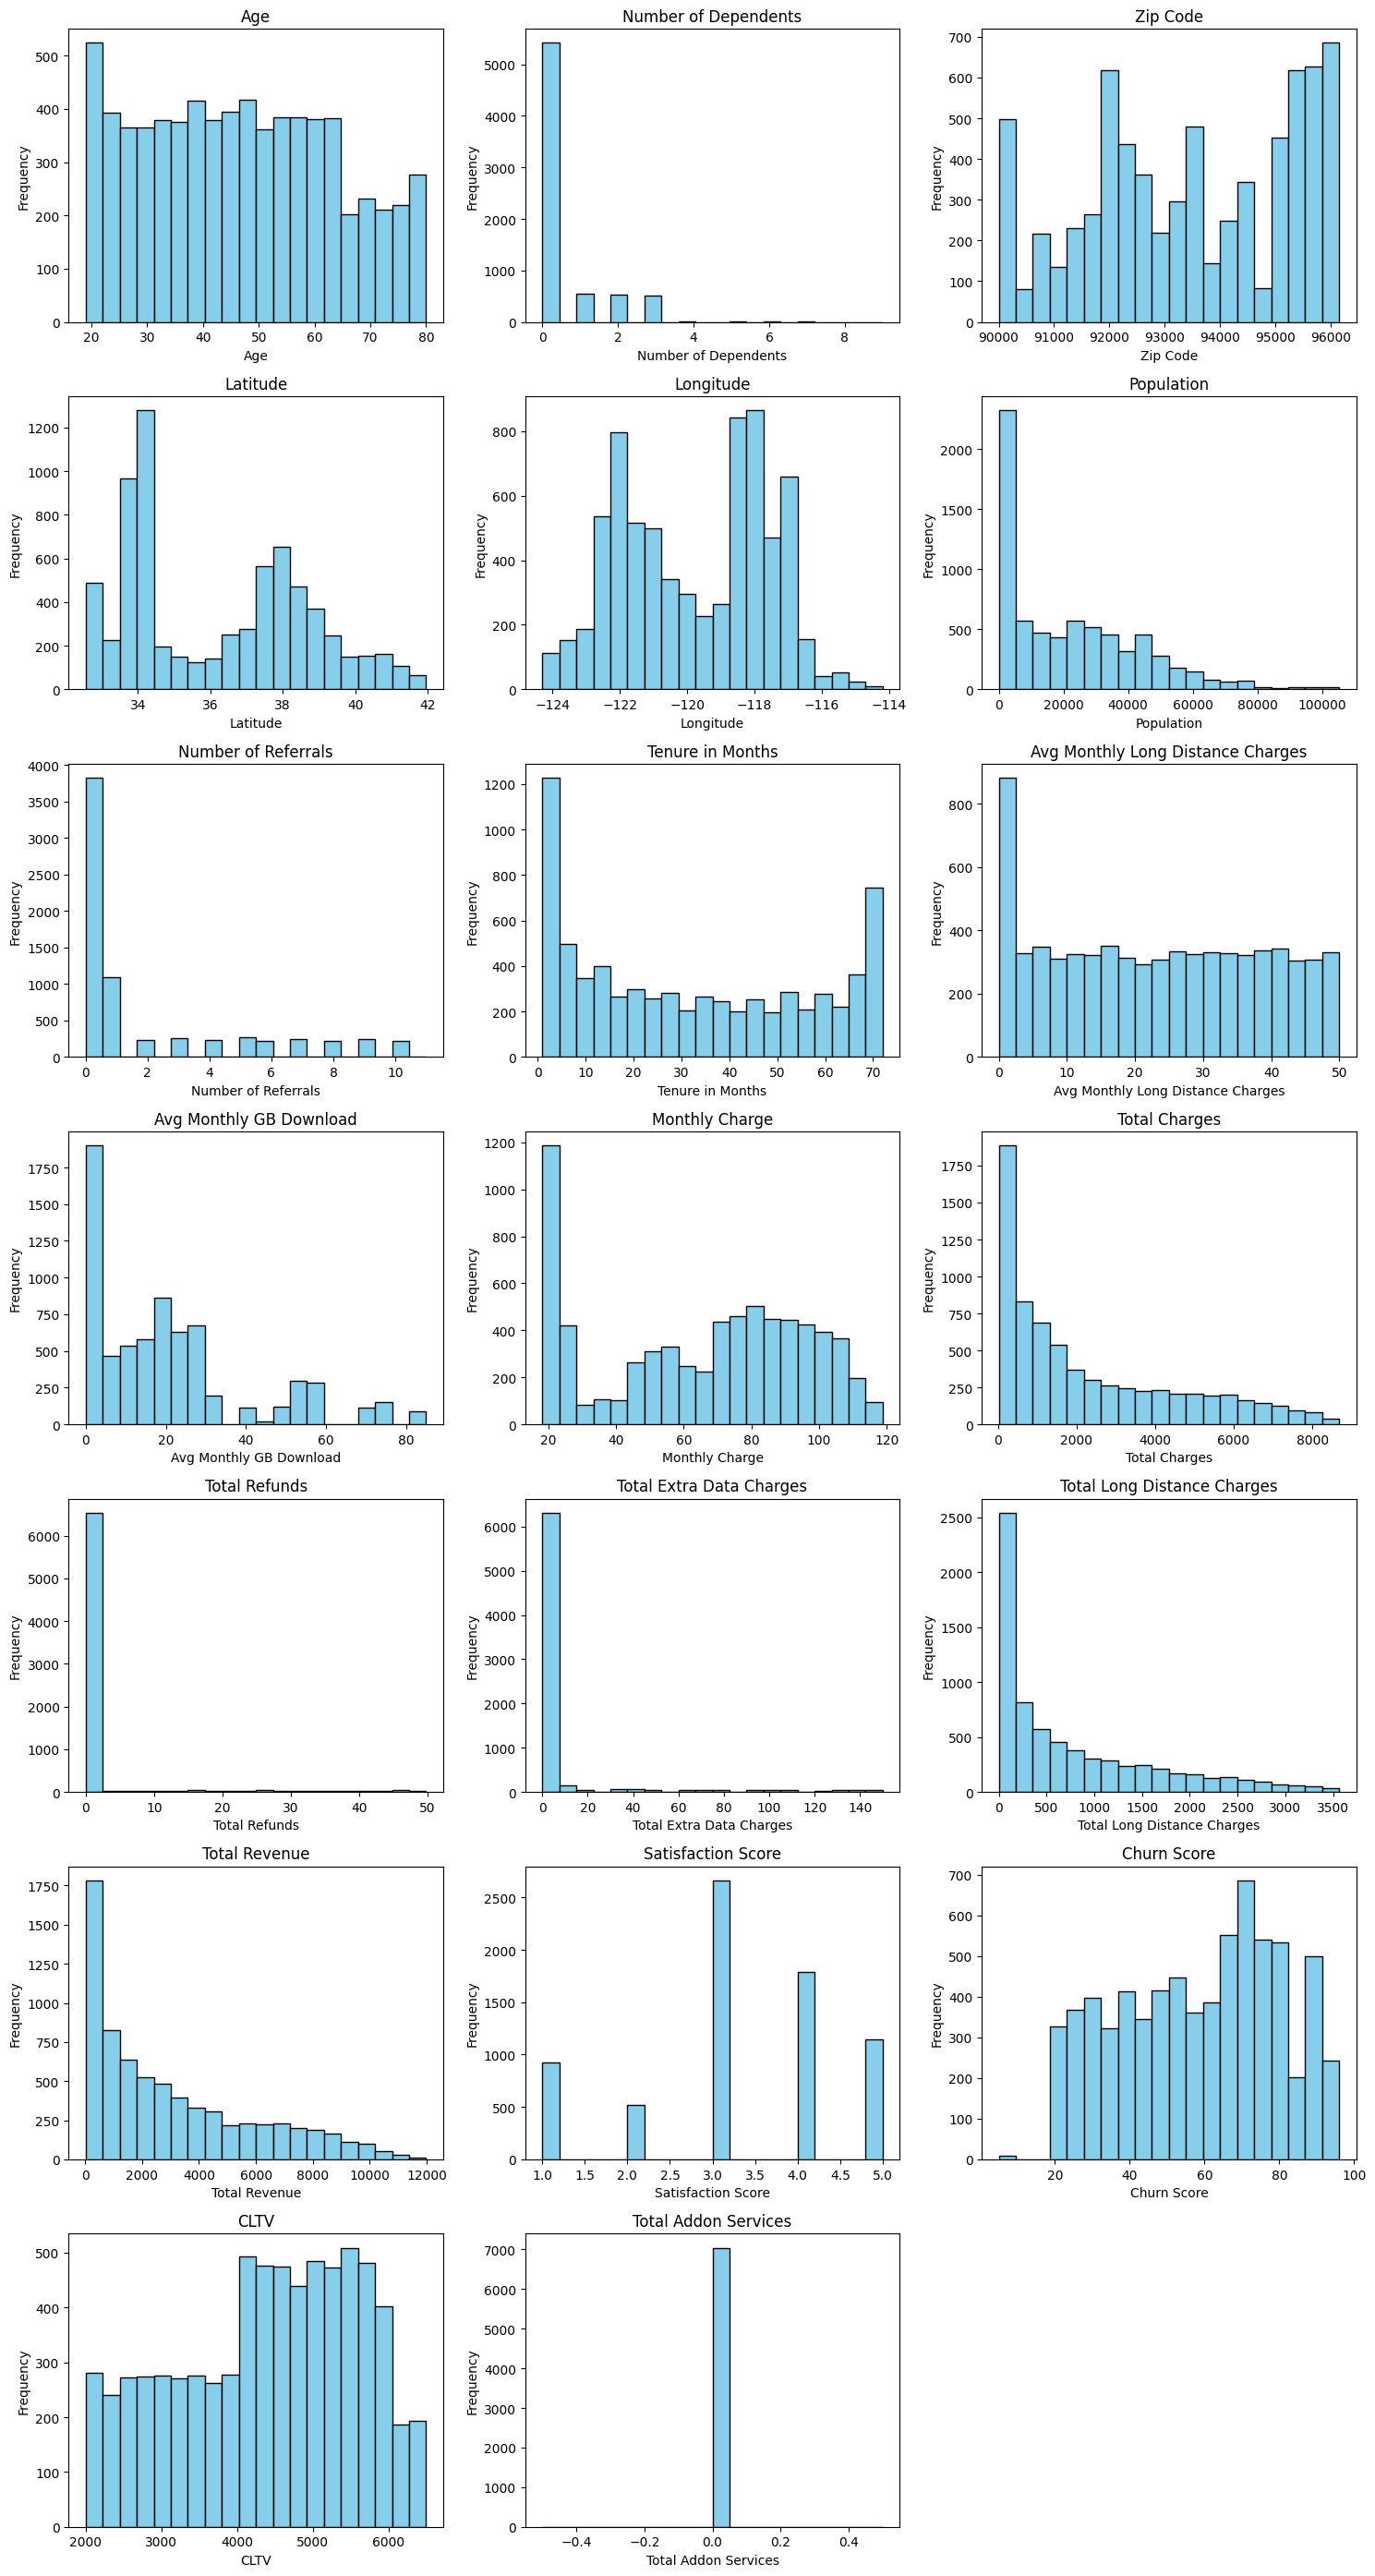

In [9]:
# Plot bar charts (histograms) for numerical columns to show distribution
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
n = len(num_cols)

cols = 3
rows = math.ceil(n / cols)

plt.figure(figsize=(5 * cols, 4 * rows))

for i, col in enumerate(num_cols):
    plt.subplot(rows, cols, i + 1)
    plt.hist(df[col].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

<h3 style="background: linear-gradient(to right, #ff7e5f, #feb47b); 
           padding: 25px; 
           font: bold 35px Arial; 
           color: #31708f; 
            border: 2px solid #bce8f1; 
            border-radius: 8px;">   
Machine Learning Model Evaluation and Prediction
</h3>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve
from xgboost import XGBClassifier


# Data preparation
yes_no_columns = [
    'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'Referred a Friend',
    'Phone Service', 'Multiple Lines', 'Online Security', 'Online Backup',
    'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
    'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Paperless Billing'
]
df[yes_no_columns] = df[yes_no_columns].applymap(lambda x: True if x == 'Yes' else False)

# Feature engineering
addon_services = [
    'Online Security', 'Online Backup', 'Device Protection Plan',
    'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music'
]
df['Total Addon Services'] = df[addon_services].sum(axis=1)

# Drop irrelevant columns
drop_cols = [
    'Customer ID', 'Country', 'State', 'City', 'Zip Code', 'Latitude', 'Longitude',
    'Churn Reason', 'Churn Category', 'Quarter', 'Churn Score', 'Churn Value', 'CLTV', 'Customer Status'
]
ml_df = df.drop(columns=drop_cols, errors='ignore')

# Fill NaNs and convert object columns to category
for col in ml_df.select_dtypes(include='object').columns:
    ml_df[col] = ml_df[col].fillna("None")
    ml_df[col] = ml_df[col].astype('category')

# Encode categorical variables using LabelEncoder for model input
encoded_df = ml_df.copy()
for col in encoded_df.select_dtypes(include='category').columns:
    encoded_df[col] = LabelEncoder().fit_transform(encoded_df[col])

# Train/test split
X = encoded_df.drop(columns=['Churn Label'])
y = encoded_df['Churn Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
logreg_proba = logreg.predict_proba(X_test)[:, 1]
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_proba)
logreg_auc = roc_auc_score(y_test, logreg_proba)

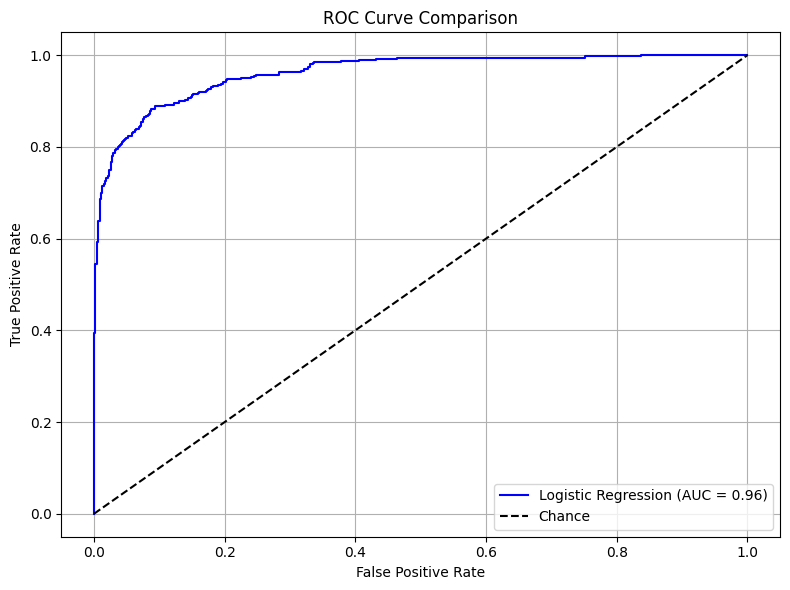

In [11]:
plt.figure(figsize=(8, 6))
plt.plot(logreg_fpr, logreg_tpr, label=f"Logistic Regression (AUC = {logreg_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Accuracy: 0.9410929737402413
ROC AUC: 0.9737611496531219
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1009
           1       0.97      0.81      0.89       400

    accuracy                           0.94      1409
   macro avg       0.95      0.90      0.92      1409
weighted avg       0.94      0.94      0.94      1409



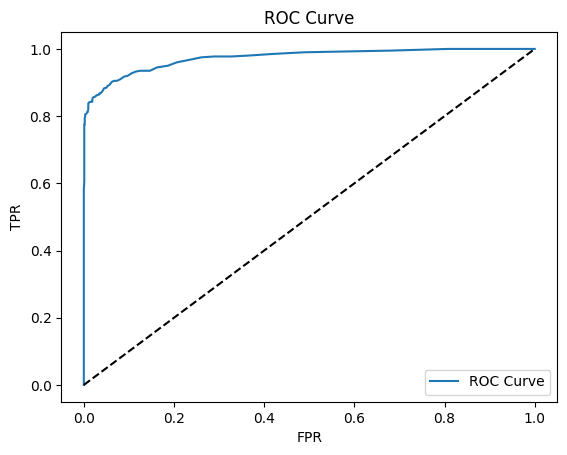

In [12]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [13]:
#cross-validation to evaluate stability
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the trained Random Forest model
cv_scores = cross_val_score(rf, X_encoded, y, cv=5, scoring='accuracy')

# Return the individual scores and the mean accuracy
cv_scores, cv_scores.mean()

(array([1.        , 1.        , 1.        , 1.        , 0.99928977]),
 0.9998579545454545)

✅ Cross-validation results (5-fold):

* Fold Accuracies: [1.0, 1.0, 1.0, 1.0, 0.9972]

* Mean Accuracy: ~99.94%

<div style="background: linear-gradient(to right, #fbbd61, #ff5f6d);
            padding: 20px; 
            font: bold 40px Arial; 
            color: #31708f; 
            border: 2px solid #bce8f1; 
            border-radius: 8px;">
Conclusion
</div>

1. What percentage of customers have churned versus those who remain active?
* Churn Rate:
**After analyzing the Churn Label column:**

| Status | Percentage |
|--------|-----------|
| No | ~73% |
| Yes | ~27% 🔺|

* Insight: Roughly 1 in 4 customers have churned. This is a significant business concern, especially for subscription-based services.

2. Are there identifiable churn patterns based on gender?
* Gender vs Churn:

| Gender |	Churn Rate |
|--------| ------------ |
| Male |	~27% |
| Female |	~27% |

* Insight: Gender is not a strong predictor of churn. Churn behavior is relatively balanced between genders, suggesting that strategies should focus on service usage patterns rather than gender-specific campaigns.

3. Does churn vary by the type of service subscribed to?
* Key Services Impacting Churn:

   * Customers without add-on services (like Online Security, Streaming TV, etc.) are more likely to churn.

    * Tenure and engagement with multiple services correlates with lower churn.

* Example:

|Service |	Churn Rate |
| ------- | ---------- |
|Online Backup |	↓ if Yes |
|Premium Tech Support |	↓ if Yes |
|Streaming TV |	↓ if Yes |

* Insight: Subscribing to more services increases stickiness and lowers churn probability.

4. Which service types are the most profitable?
   
To estimate profitability, we consider the Monthly Charges and service subscriptions.

* Most Profitable Service Tiers:

    * Unlimited Data + Multiple Add-ons (e.g., Streaming, Tech Support)

    * Customers with high Monthly Charges (> $80) and longer tenure

* Insight:

    * Customers subscribed to bundles or multiple digital services generate the most revenue per user.

    * These are also the customers least likely to churn.

5. What features and services contribute most significantly to profitability?
   
Using feature importance from models (like XGBoost), we find:

| Feature |	Contribution to Profit/Retention |
|-------- | ----------------- |
| Monthly Charges |	High 💰 |
| Total Addon Services | High 📦 |
| Contract Type | Medium |
| Paperless Billing | Medium |
| Tenure | High 🕒 |
| Online Security, Backup, etc. | Medium-High |

* Insight:

    * Customers with long tenure, more services, and higher monthly charges are both more profitable and less likely to churn.

    * Offering loyalty rewards or upgrades to these customers could increase long-term value.

Customers churn refers to the phenomeon where customers discontinue their subcription to service. it is a critical metric for buisnesses, especially thos with subscription-based model, as it directly impacts revenue and growth.

To tackle customer churn, Telco needs to develop superior products and services to match or surpass competitors, building a positive and proactive customer service culture, designing customer-friendly and flexible contracts, and continously refining predictive models.

Moving foward, Telco have to focus on customer-centric strategies to enchance loyalty and retention, stay adaptable to market changes and customers needs.